In [8]:
from io import open
import requests
import shutil
from zipfile import ZipFile
import os
from imageai.Prediction.Custom import ModelTraining
DATASET_DIR = 'data_pallet_pilha'
model_trainer = ModelTraining()
model_trainer.setModelTypeAsResNet()
model_trainer.setDataDirectory(DATASET_DIR)
model_trainer.trainModel(num_objects=4, num_experiments=5, enhance_data=True, batch_size=20, show_network_summary=True)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_318 (Conv2D)             (None, 112, 112, 64) 9472        input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_318 (BatchN (None, 112, 112, 64) 256         conv2d_318[0][0]                 
__________________________________________________________________________________________________
activation_300 (Activation)     (None, 112, 112, 64) 0           batch_normalization_318[0][0]    
__________________________________________________________________________________________________
max_poolin

Found 6605 images belonging to 4 classes.
Found 1382 images belonging to 4 classes.
JSON Mapping for the model classes saved to  data_pallet_pilha\json\model_class.json
Number of experiments (Epochs) :  5
Epoch 1/5
285/330 [========================>.....] - ETA: 20:56 - loss: 0.6751 - acc: 0.7784

C:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py:918: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


329/330 [============================>.] - ETA: 27s - loss: 0.6589 - acc: 0.7830
Epoch 00001: saving model to data_pallet_pilha\models\model_ex-001_acc-0.534783.h5
330/330 [==============================] - 9511s 29s/step - loss: 0.6573 - acc: 0.7836 - val_loss: 1.7632 - val_acc: 0.5348
Epoch 2/5
329/330 [============================>.] - ETA: 27s - loss: 0.3939 - acc: 0.8637
Epoch 00002: saving model to data_pallet_pilha\models\model_ex-002_acc-0.552899.h5
330/330 [==============================] - 9282s 28s/step - loss: 0.3946 - acc: 0.8633 - val_loss: 1.2631 - val_acc: 0.5529
Epoch 3/5
329/330 [============================>.] - ETA: 27s - loss: 0.3297 - acc: 0.8840
Epoch 00003: saving model to data_pallet_pilha\models\model_ex-003_acc-0.912319.h5
330/330 [==============================] - 9258s 28s/step - loss: 0.3296 - acc: 0.8841 - val_loss: 0.3847 - val_acc: 0.9123
Epoch 4/5
329/330 [============================>.] - ETA: 27s - loss: 0.2081 - acc: 0.9290
Epoch 00004: saving model

In [30]:
from imageai.Prediction.Custom import CustomImagePrediction
import os


execution_path = os.getcwd()

detector = CustomImagePrediction()
detector.setModelTypeAsResNet()
detector.setModelPath( os.path.join(execution_path , "data_pallet_pilha/models/model_ex-005_acc-0.919565.h5"))
detector.setJsonPath("data_pallet_pilha/json/model_class.json")
detector.loadModel(num_objects=4)


In [39]:
execution_path = os.getcwd()
img_path = 'downloads/pallet/../outros/2. cx_madeira_1.jpg'

predictions, probabilities = detector.predictImage(os.path.join(execution_path, img_path), result_count=4)

for eachPrediction, eachProbability in zip(predictions, probabilities):
    print(eachPrediction , " : " , eachProbability)
    

pallet stack  :  69.91581320762634
pallet  :  15.792559087276459
caixa de madeira  :  14.291578531265259
neg  :  5.8454230611459934e-05


In [69]:
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

# set tf backend to allow memory to grow, instead of claiming everything
import tensorflow as tf

def get_session():
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    return tf.Session(config=config)

# use this environment flag to change which GPU to use
#os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# set the modified tf session as backend in keras
keras.backend.tensorflow_backend.set_session(get_session())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [70]:
import keras
from keras_retinanet import models
import os

execution_path = os.getcwd()
# model_path = os.path.join(execution_path , "data_pallet_pilha/models/model_ex-005_acc-0.919565.h5")

# # load retinanet model
# model = models.load_model(model_path, backbone_name='resnet50')
model_path = os.path.join('resnet50_coco_best_v2.1.0.h5')
# model_path = os.path.join('data_pallet_pilha', 'models', 'model_ex-005_acc-0.919565.h5')

# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50')

C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


[array([[[415.04617, 151.71503, 779.3622 , 741.2505 ],
        [ -1.     ,  -1.     ,  -1.     ,  -1.     ],
        [ -1.     ,  -1.     ,  -1.     ,  -1.     ],
        ...,
        [ -1.     ,  -1.     ,  -1.     ,  -1.     ],
        [ -1.     ,  -1.     ,  -1.     ,  -1.     ],
        [ -1.     ,  -1.     ,  -1.     ,  -1.     ]]], dtype=float32), array([[ 0.99785477, -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , 

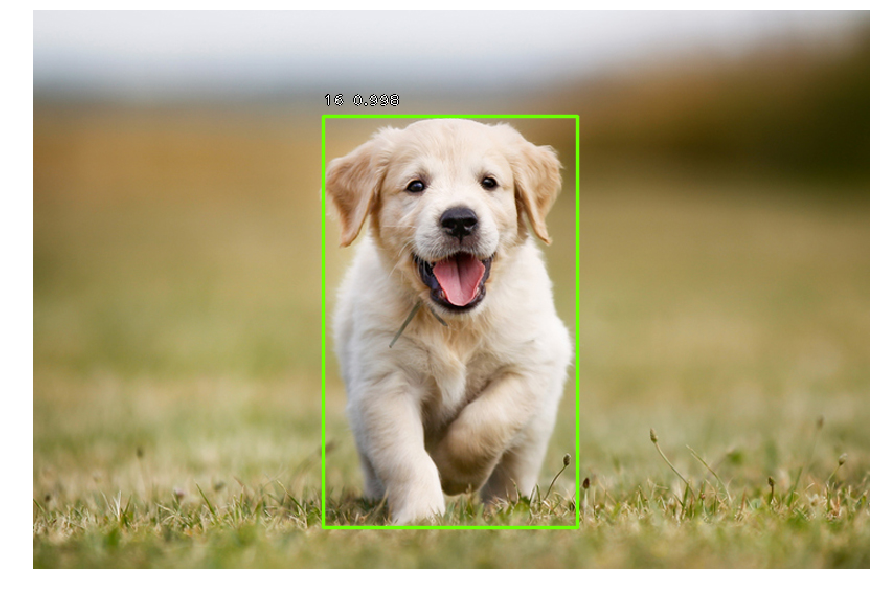

In [72]:
# load image
image = read_image_bgr('downloads/pallet/../outros/cachorro.jpg')

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# correct for image scale
boxes /= scale

# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.5:
        break
        
    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
    
    caption = "{} {:.3f}".format(label, score)
    draw_caption(draw, b, caption)
    
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()